In [46]:
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

In [47]:
# load dataset
df=pd.read_csv("classification_2.csv",delimiter=',')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [48]:
# rename columns
df.columns=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial_Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital_Gain", "Capital_Loss",
        "Hours_per_week", "Country", "Target"]

In [49]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [50]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [51]:
df['Target'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [52]:
# display columns in dataset
df.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country', 'Target'],
      dtype='object')

In [53]:
df.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target            object
dtype: object

In [54]:
# display shape of dataset
print('dataset has {0} rows and {1} column'.format(df.shape[0],df.shape[1]))

dataset has 32560 rows and 15 column


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
Age               32560 non-null int64
Workclass         32560 non-null object
fnlwgt            32560 non-null int64
Education         32560 non-null object
Education-Num     32560 non-null int64
Martial_Status    32560 non-null object
Occupation        32560 non-null object
Relationship      32560 non-null object
Race              32560 non-null object
Sex               32560 non-null object
Capital_Gain      32560 non-null int64
Capital_Loss      32560 non-null int64
Hours_per_week    32560 non-null int64
Country           32560 non-null object
Target            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [56]:
# checking missing values
df.columns[df.isnull().any()]

Index([], dtype='object')

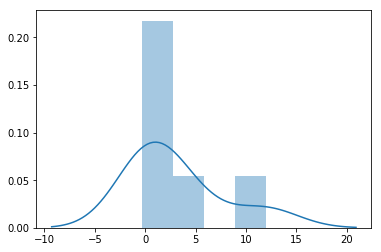

In [57]:
target = df.skew()
sb.distplot(target)

In [58]:
# getting target value greater  than 50k and less than 50k
df['Target'].value_counts()

 <=50K    24719
 >50K      7841
Name: Target, dtype: int64

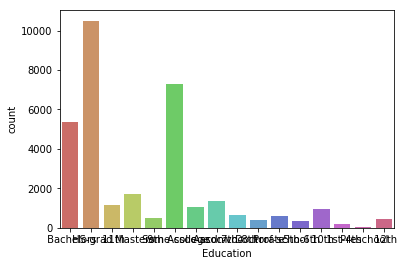

In [59]:
# plot Target of <=50k and >50k
sb.countplot(x='Education',  data=df, palette='hls')
plt.show()

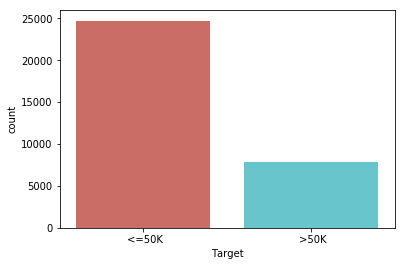

In [60]:
sb.countplot(x='Target',  data=df, palette='hls')
plt.show()

In [61]:
df.duplicated().sum()

24

In [62]:
# remove duplicated values from dataframe
df.drop_duplicates(keep=False, inplace=True)
df.duplicated().sum()

0

In [63]:
df.shape

(32513, 15)

In [64]:
# correlation of multivariate variable
temp=df.corr(method='pearson')
temp.head(11)

,Age,fnlwgt,Education-Num,Capital_Gain,Capital_Loss,Hours_per_week
Age,1.000000,-0.076249,0.036010,0.077681,0.057722,0.068273
fnlwgt,-0.076249,1.000000,-0.043546,0.000430,-0.010276,-0.019029
Education-Num,0.036010,-0.043546,1.000000,0.122690,0.079879,0.148707
Capital_Gain,0.077681,0.000430,0.122690,1.000000,-0.031661,0.078407
Capital_Loss,0.057722,-0.010276,0.079879,-0.031661,1.000000,0.054202
Hours_per_week,0.068273,-0.019029,0.148707,0.078407,0.054202,1.000000


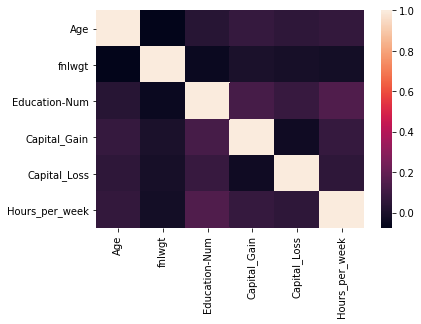

In [65]:
corr = df.corr()
sb.heatmap(corr)

In [66]:
df.shape

(32513, 15)

In [67]:
df.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target            object
dtype: object

In [68]:
# get dummy variables whose are in categorical data
# for name in df.columns:
#     if df[name].dtype != "int64":
#         df[name] = pd.get_dummies(df[name]) 
df = pd.get_dummies(df,columns=["Workclass","Education","Martial_Status","Occupation","Relationship", "Race", "Sex","Country","Target"])
df.head()

,Age,fnlwgt,Education-Num,Capital_Gain,Capital_Loss,Hours_per_week,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Target_ <=50K,Target_ >50K
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [69]:
def Feature_Scaling(df):
        for column in df.columns:
            df[column] = ((df[column] - df[column].min()) /
                             (df[column].max() - df[column].min()))
        return df

In [70]:
df = Feature_Scaling(df)

In [71]:
df.shape

(32513, 110)

In [72]:
df.head(30)

,Age,fnlwgt,Education-Num,Capital_Gain,Capital_Loss,Hours_per_week,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Target_ <=50K,Target_ >50K
0,0.452055,0.048238,0.800000,0.000000,0.000000,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.287671,0.138113,0.533333,0.000000,0.000000,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.493151,0.151068,0.400000,0.000000,0.000000,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.150685,0.221488,0.800000,0.000000,0.000000,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.273973,0.184932,0.866667,0.000000,0.000000,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.438356,0.100448,0.266667,0.000000,0.000000,0.153061,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.479452,0.134036,0.533333,0.000000,0.000000,0.448980,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,0.191781,0.022749,0.866667,0.140841,0.000000,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,0.342466,0.099947,0.800000,0.051781,0.000000,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,0.273973,0.182135,0.600000,0.000000,0.000000,0.806122,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [73]:
df.shape

(32513, 110)

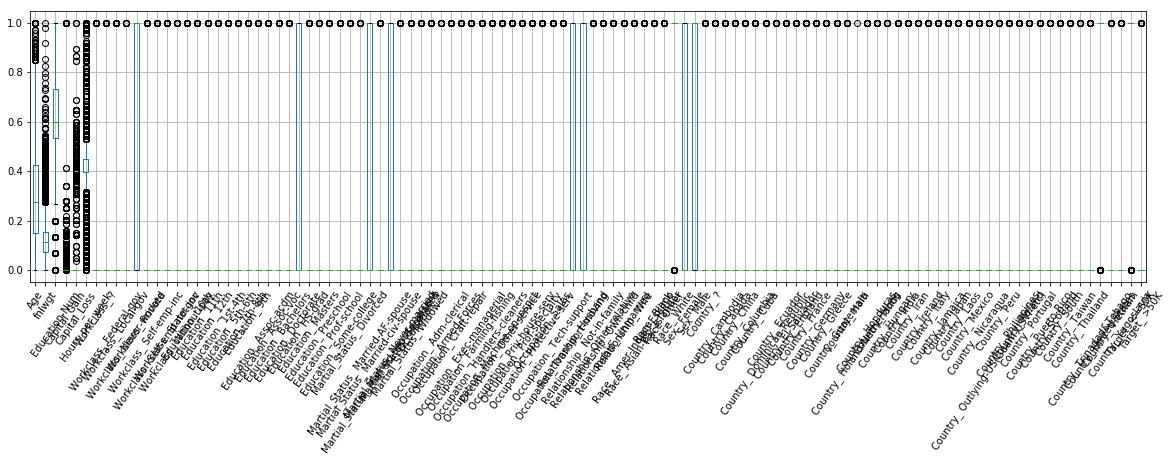

In [74]:
# boxplot dataset
df.boxplot(rot=55, figsize=(20,5))